<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/kaggle-competition/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
r = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic 

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 21.3MB/s]


In [4]:
!unzip -qq titanic.zip

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
import seaborn as sns

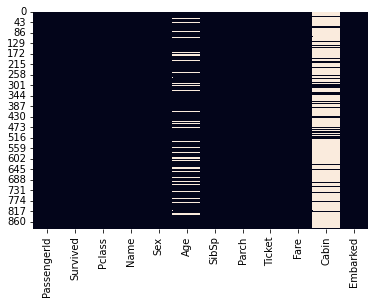

In [10]:
sns.heatmap(df.isnull(), cbar=False)

In [11]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [12]:
df_label = df["Survived"]

In [13]:
df_label.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [14]:
df_data = df[["PassengerId", "Pclass", "Sex", "Age", "Fare", "Survived"]]

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


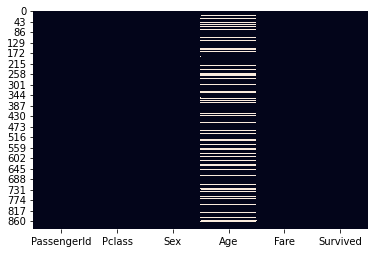

In [16]:
sns.heatmap(df_data.isnull(), cbar=False)

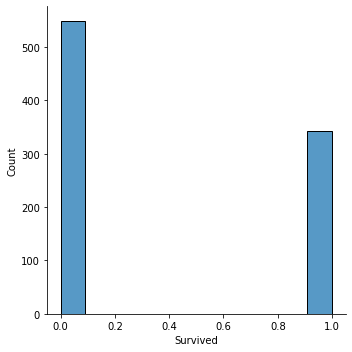

In [17]:
r = sns.displot(data=df_data["Survived"])

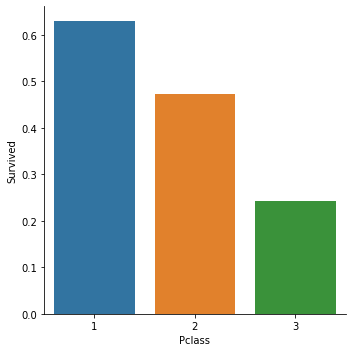

In [18]:
r = sns.catplot(data=df_data, x="Pclass", y="Survived", kind='bar', ci=None)

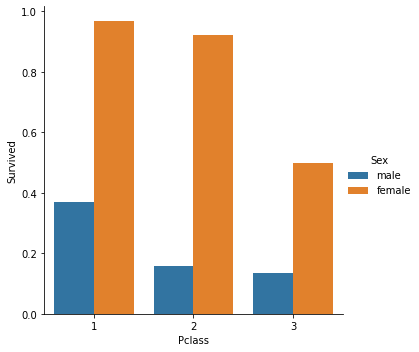

In [19]:
r = sns.catplot(data=df_data, y="Survived", x="Pclass", hue="Sex", kind="bar", ci=None)

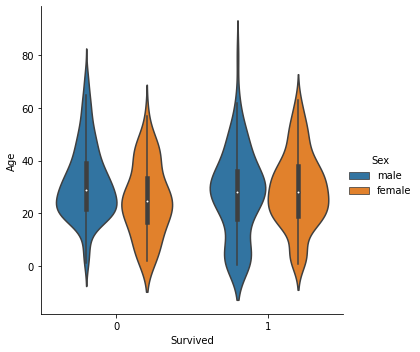

In [20]:
r= sns.catplot(data=df_data, x="Survived", y="Age", hue="Sex", kind="violin")

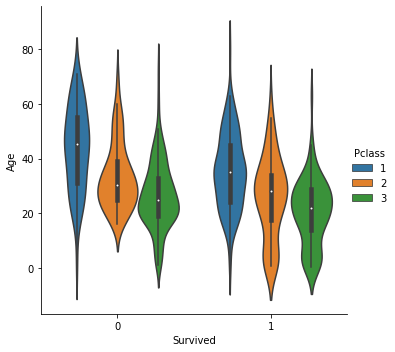

In [21]:
r=sns.catplot(data=df_data, x="Survived", y="Age", hue="Pclass", kind="violin")

In [24]:
encoding_ref = {"Sex": {"male": 0, "female": 1}}

In [25]:
df_data = df_data.replace(encoding_ref)

df_data.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Survived
0,1,3,0,22.0,7.2500,0
1,2,1,1,38.0,71.2833,1
2,3,3,1,26.0,7.9250,1
3,4,1,1,35.0,53.1000,1
4,5,3,0,35.0,8.0500,0


In [50]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [51]:
df_data["Age"].mean()

29.69911764705882

In [54]:
#Fill blanks with mean of Age
df_data["Age"] = df_data["Age"].fillna(29.69)

In [55]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [97]:
def return_data_and_label(df_data):
  #shuffle rows
  df_data = df_data.sample(frac = 1)
  return df_data[["Pclass", "Sex", "Age", "Fare"]].to_numpy(), df_data["Survived"].to_numpy()

In [98]:
training_data, training_label = return_data_and_label(df_data)

In [99]:
training_data.shape

(891, 4)

In [100]:
#normalize data
training_data = training_data / 100.

In [101]:
training_data

array([[0.03   , 0.     , 0.28   , 0.07925],
       [0.02   , 0.     , 0.39   , 0.13   ],
       [0.03   , 0.     , 0.405  , 0.0775 ],
       ...,
       [0.03   , 0.01   , 0.2969 , 0.0775 ],
       [0.02   , 0.     , 0.57   , 0.1235 ],
       [0.02   , 0.     , 0.32   , 0.105  ]])

In [102]:
training_label.shape

(891,)

In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [104]:
def get_model():
  model = keras.Sequential([
      layers.Input(shape=(4,)),
      layers.Dense(64, activation="relu"),
      #layers.Dense(128, activation="relu"),
      #layers.Dense(256, activation="relu"),
      layers.Dense(1, activation="sigmoid")
  ])

  model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=['accuracy'])

  return model

In [109]:
#Try various options. Training loss bottoms out around 320 epochs
epochs=350

In [110]:
model = get_model()

run_history = model.fit(training_data,
                        training_label,
                        epochs = epochs,
                        validation_split=0.3,
                        batch_size=32)

Epoch 1/350
20/20 [==============================] - 1s 11ms/step - loss: 0.6796 - accuracy: 0.6180 - val_loss: 0.6704 - val_accuracy: 0.6007
Epoch 2/350
20/20 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6469 - val_loss: 0.6582 - val_accuracy: 0.6231
Epoch 3/350
20/20 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6565 - val_loss: 0.6497 - val_accuracy: 0.6269
Epoch 4/350
20/20 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6597 - val_loss: 0.6425 - val_accuracy: 0.6418
Epoch 5/350
20/20 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.6581 - val_loss: 0.6371 - val_accuracy: 0.6530
Epoch 6/350
20/20 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.6581 - val_loss: 0.6327 - val_accuracy: 0.6530
Epoch 7/350
20/20 [==============================] - 0s 4ms/step - loss: 0.6270 - accuracy: 0.6629 - val_loss: 0.6299 - val_accuracy: 0.6530
Epoch 8/350


In [107]:
import matplotlib.pyplot as plt

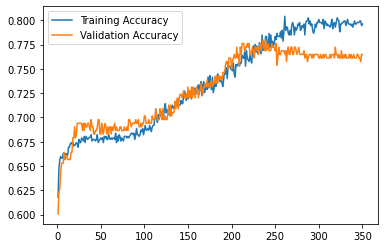

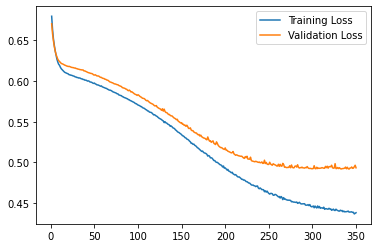

In [111]:
chart_epochs = range(1, epochs + 1)

plt.plot(chart_epochs, run_history.history['accuracy'], label="Training Accuracy")
plt.plot(chart_epochs, run_history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(chart_epochs, run_history.history['loss'], label="Training Loss")
plt.plot(chart_epochs, run_history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.show()